# Value Iteration & Policy Iteration

We will use a simple gridworld example.





![gridworld](./gridworld.png)

Transition function: When an agent performs a move she will go in the correct direction with probability 0.8. However, she may slip and go in each of the perpendicular directions with probability 0.1. Two states on the right are terminal step, each action performed there ends the episode.

Reward function: The agent gets a penalty for every move she makes, doing an action in the two terminal states yield a reward of 1 (state (4,3)), resp(-1 (state (4,2))).

We number the states as follows:

| 7 | 8 | 9 | 10 |
|---|---|----|---|
| **4** |  - | **5** | **6**  |
| **0** | **1** | **2** | **3**  |

States 6 and 10 are final states.

We have 4 possible different actions, denoted as follows:
* $\uparrow$: 0 
* $\leftarrow$ : 1
* $\downarrow$: 2
* $\rightarrow$ : 3

We write below the transition and reward matrices ($T$ and $R$). Hence, $T[s_1,a,s_2]$ yields the probability that the agent reaches $s_2$ when performing action $a$ in state $s_1$ and $R[s,a]$ yields the reward that the agent gets when doing action $a$ in state $s$.

You can easily change the penalty value for performing one movement action by changing the `penalty` variable below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

l = 0.8
s = 0.1
v_win = 1
v_lose = -1

T = np.zeros((11, 4, 11))
#UP
T[0,0,:]=[s, s, 0, 0, l, 0, 0, 0, 0, 0, 0 ] 
T[1,0,:]=[s, l, s, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,0,:]=[0, s, 0, s, 0, l, 0, 0, 0, 0, 0 ]
T[3,0,:]=[0, 0, s, s, 0, 0, l, 0, 0, 0, 0 ]
T[4,0,:]=[0, 0, 0, 0, 2*s, 0, 0, l, 0, 0, 0 ]
T[5,0,:]=[0, 0, 0, 0, 0, s, s, 0, 0, l, 0 ]
T[6,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,0,:]=[0, 0, 0, 0, 0, 0, 0, s+l, s, 0, 0 ]
T[8,0,:]=[0, 0, 0, 0, 0, 0, 0, s, l, s, 0 ]
T[9,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, s, l, s ]
T[10,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]
#LEFT
T[0,1,:]=[s+l, 0, 0, 0, s, 0, 0, 0, 0, 0, 0 ] 
T[1,1,:]=[l, 2*s, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,1,:]=[0, l, s, 0, 0, s, 0, 0, 0, 0, 0 ]
T[3,1,:]=[0, 0, l, s, 0, 0, s, 0, 0, 0, 0 ]
T[4,1,:]=[s, 0, 0, 0, l, 0, 0, s, 0, 0, 0 ]
T[5,1,:]=[0, 0, s, 0, 0, l, 0, 0, 0, s, 0 ]
T[6,1,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,1,:]=[0, 0, 0, 0, s, 0, 0, s+l, 0, 0, 0 ]
T[8,1,:]=[0, 0, 0, 0, 0, 0, 0, l, 2*s, 0, 0 ]
T[9,1,:]=[0, 0, 0, 0, 0, s, 0, 0, l, s, 0 ]
T[10,1,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]
# DOWN
T[0,2,:]=[s+l, s, 0, 0, 0, 0, 0, 0, 0, 0, 0 ] 
T[1,2,:]=[s, l, s, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,2,:]=[0, s, l, s, 0, 0, 0, 0, 0, 0, 0 ]
T[3,2,:]=[0, 0, s, l+s, 0, 0, 0, 0, 0, 0, 0 ]
T[4,2,:]=[l, 0, 0, 0, 2*s, 0, 0, 0, 0, 0, 0 ]
T[5,2,:]=[0, 0, l, 0, 0, s, s, 0, 0, 0, 0 ]
T[6,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,2,:]=[0, 0, 0, 0, l, 0, 0, s, s, 0, 0 ]
T[8,2,:]=[0, 0, 0, 0, 0, 0, 0, s, l, s, 0 ]
T[9,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, s, l, s ]
T[10,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]
#RIGHT
T[0,3,:]=[s, l, 0, 0, s, 0, 0, 0, 0, 0, 0 ] 
T[1,3,:]=[0, 2*s, l, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,3,:]=[0, 0, s, l, 0, s, 0, 0, 0, 0, 0 ]
T[3,3,:]=[0, 0, 0, s+l, 0, 0, s, 0, 0, 0, 0 ]
T[4,3,:]=[s, 0, 0, 0, l, 0, 0, s, 0, 0, 0 ]
T[5,3,:]=[0, 0, s, 0, 0, 0, l, 0, 0, s, 0 ]
T[6,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,3,:]=[0, 0, 0, 0, s, 0, 0, s, l, 0, 0 ]
T[8,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 2*s, l, 0 ]
T[9,3,:]=[0, 0, 0, 0, 0, s, 0, 0, 0, s, l ]
T[10,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]

penalty= -0.1;
R = penalty*np.ones((11,4))
R[10,:]= np.ones(4)*v_win
R[6,:]= np.ones(4)*v_lose


## Value Iteration
Implement the value iteration algorithm. The method will take as input:
* $\epsilon$ the parameter for the stopping criterion.
* $\gamma$ the discounting factor
* $T$ the transition matrix
* $R$ the reward matrix

The method returns the vector $v: S \rightarrow {\mathbb R}$ associating to each state the optimal value of this state.

The $printV$ method below will display the values of $v$ for the gridworld problem.

In [2]:
def valueIteration(eps, gamma, T, R):
    nb_state = len(T)
    nb_action = R.shape[1]
    v = np.zeros(nb_state)
    v_tmp = np.zeros(nb_state)
    ite = 0
    while ite == 0 or np.linalg.norm(v_tmp - v) > (1 - gamma)/(2*gamma)*eps:
        v_tmp = v
        for s in range(nb_state):
            vs = [R[s, a] + gamma*sum([T[s, a, sprime]*v_tmp[sprime] for sprime in range(nb_action)]) for a in range(nb_action)]
            v[s] = max(vs)
        ite += 1
    return v

In [3]:
def printV(v):
  print('| {:03.2f} | {:03.2f} | {:03.2f} | {:03.2f} |'.format(v[7], v[8], v[9], v[10]))
  print('| {:03.2f} | ---- | {:03.2f} | {:03.1f} |'.format(v[4], v[5], v[6]))
  print('| {:03.2f} | {:03.2f} | {:03.2f} | {:03.2f} |'.format(v[0], v[1], v[2], v[3]))

In [4]:
w = valueIteration(0.1, 0.9, T, R)
printV(w)

| -0.10 | -0.10 | -0.10 | 1.00 |
| -0.10 | ---- | -0.10 | -1.0 |
| -0.10 | -0.10 | -0.10 | -0.10 |


In [5]:
# plot the best policy given the value function v:
# i.e. plot the best action for each state given the value function v.

def plotBestPolicy(v, gamma):
  bestV=np.zeros(11)
  bestA=np.zeros(11)
  fig, ax = plt.subplots()
  # policy extraction
  for s1 in range(11):
    val=[]
    for a in range(4):
      va=0
      for s2 in range(11):
        va += T[s1,a,s2]*v[s2]
      val= val+[ R[s1,a]+gamma*va ]
    bestV[s1]=np.max(val)
    bestA[s1]=np.argmax(val)

    matV= np.array( [[bestV[7], bestV[8], bestV[9], bestV[10]],
                    [bestV[4],   -1 , bestV[5], bestV[6]],
                    [bestV[0], bestV[1], bestV[2], bestV[3]]]
                    )
    matA = np.array([
                    [bestA[7], bestA[8], bestA[9], -1],
                    [bestA[4],   -1 , bestA[5], -1],
                    [bestA[0], bestA[1], bestA[2], bestA[3]]])

    im = ax.imshow(matV)


  for i in range(matV.shape[0]):
      for j in range(matV.shape[1]):
          if matA[i][j]==-1:
              arrow = ''
          elif matA[i, j] == 0:
              arrow = '^'
          elif matA[i, j] == 1:
              arrow = '<'
          elif matA[i, j] == 2:
              arrow = 'v'
          elif matA[i, j] == 3:
              arrow = '>'
          text = ax.text(j, i, arrow, ha = "center", va = "center",
                         color = "black")
            
  cbar = ax.figure.colorbar(im, ax = ax)
    
  fig.tight_layout()
  plt.show() 

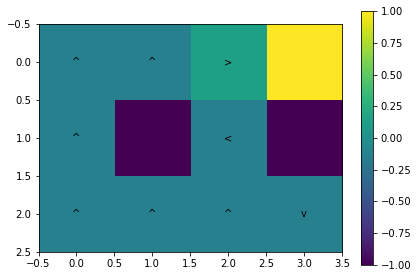

In [6]:
plotBestPolicy(w, 0.3)

## Policy Iteration

Implement the policy iteration algorithm. The method will consider the same arguments as value iteration. 


In [ ]:
R

: 

In [ ]:
def policyIteration(eps, gamma, T, R):
    nb_state = len(T)
    pi = np.zeros(nb_state)
    pi_tmp = np.zeros(nb_state)
    ite = 0
    while ite == 0 or pi != pi_tmp:
        v = R[:, ]
        
        t += 1

: 

In [ ]:
w,p = policyIteration(0.001, 0.9, T, R)
print(p)
printV(w)
plotBestPolicy(w, 0.9)

: 

: 